# Feature Selection Tutorial
## Q1
In Scikit-Learn, apply filter-based feature selection with Information Gain to identify the 3 most discriminating and 3 least discriminating features in the Wine dataset in the ARFF file provided.  
Based on these results, assess the 10-fold cross-validation classification accuracy of a 1-Nearest Neighbour classifier with: 
1. only the 3 most discriminating features included
2. only the 3 least discriminating features included 


In [1]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn import preprocessing

In [2]:
wine_DF = pd.read_csv('wine.csv')
print(wine_DF.shape)
wine_DF.head()

(178, 14)


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Type1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Type1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Type1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Type1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Type1


In [3]:
y = wine_DF.pop('class').values
X = wine_DF.values
wine_DF.shape
feature_names = wine_DF.columns

In [4]:
i_scores = mutual_info_classif(X,y)

Put the I-Gain scores in a dataframe and sort. 

In [5]:
FS_DF = pd.DataFrame(i_scores,index = wine_DF.columns, columns =['I-Gain'])
FS_DF.sort_values(by=['I-Gain'],ascending=False,inplace=True)
FS_DF

,I-Gain
Flavanoids,0.669314
Proline,0.568571
Color_intensity,0.549770
OD280/OD315_of_diluted_wines,0.514595
Alcohol,0.468869
Hue,0.455749
Total_phenols,0.425216
Proanthocyanins,0.286819
Malic_acid,0.281714
Alcalinity_of_ash,0.255599


Generate top 3 and bottom 3 dataframes and produce the corresponding X (numpy) arrays.

In [6]:
bottom3_DF = wine_DF[FS_DF.index[-3:]]
X_bottom3 = bottom3_DF.values

In [7]:
top3_DF = wine_DF[FS_DF.index[:3]]
X_top2 = top3_DF.values

In [8]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=1)

In [9]:
bottom3_DF

,Magnesium,Nonflavanoid_phenols,Ash
0,127,0.28,2.43
1,100,0.26,2.14
2,101,0.30,2.67
3,113,0.24,2.50
4,118,0.39,2.87
...,...,...,...
173,95,0.52,2.45
174,102,0.43,2.48
175,120,0.43,2.26
176,120,0.53,2.37


In [10]:
from sklearn.model_selection import cross_val_score
## cross validation - see notebook 08 Evaluation

In [11]:
kNN_scores = cross_val_score(kNN, X_bottom3, y, cv=10)
print("10x CV Bottom: {0:.2f}".format(kNN_scores.mean()))
kNN_scores

10x CV Bottom: 0.49


array([0.44444444, 0.5       , 0.55555556, 0.5       , 0.38888889,
       0.66666667, 0.55555556, 0.33333333, 0.41176471, 0.52941176])

In [12]:
kNN_scores = cross_val_score(kNN, X_top2, y, cv=10)
print("10x CV Top: {0:.2f}".format(kNN_scores.mean()))
kNN_scores

10x CV Top: 0.78


array([0.77777778, 0.77777778, 0.72222222, 0.72222222, 0.77777778,
       0.77777778, 0.72222222, 0.77777778, 0.82352941, 0.88235294])

---
## Q2
Using **mlxtend**, identify informative feature subsets by applying wrapper-based feature selection to the Wine dataset using a 3-Nearest Neighbour classifier and the following search strategies: 
- forward sequential search 
- backward elimination search  
  
Which common features were selected by both search strategies?



In [13]:
# install mlxtend if required
# pip install  mlxtend

In [14]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn = KNeighborsClassifier(n_neighbors=4)
wine_scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = wine_scaler.transform(X)

## Q3
In situations where there is a lot of data available, it may not be necessary to use all the data for Wrapper-based feature selection. Try this out with the dataset in `segmentation-all.csv` (2310  data points). 
1. Run forward-sequential-search to select 5 features and test the accuracy of the select feature subset using cross validation (code below).
2. Repeat but using only 1000 datapoints (X_scaled[:1000]).
3. Is the same feature subset selected, is the accuracy the same?

In [15]:
knn = KNeighborsClassifier(n_neighbors=4)

seg_data = pd.read_csv('segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [16]:
y = seg_data.pop('Class').values
X = seg_data.values
seg_scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = seg_scaler.transform(X)
print(X_scaled.shape)
feature_names = seg_data.columns

(2310, 19)


In [17]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs_all = SFS(knn, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='accuracy',
           cv=0)

sfs_all = sfs_all.fit(X_scaled, y)
inds = sfs_all.k_feature_names_
[feature_names[int(x)] for x in inds]

['REGION-CENTROID-ROW',
 'HEDGE-MEAN',
 'INTENSITY-MEAN',
 'SATURATION-MEAN',
 'HUE-MEAN']

In [18]:
X_w_all = sfs_all.transform(X_scaled)
X_w_all.shape

(2310, 5)

In [19]:
from sklearn.model_selection import cross_val_score
acc_all = cross_val_score(knn, X_w_all, y, cv=10)
print("10x CV Accuracy Wrapper (All) features: {0:.2f}".format(acc_all.mean())) 

10x CV Accuracy Wrapper (All) features: 0.95


### Q4
The purpose of this exercise is to explore the impact of using PCA as a preprocessing step in classification.   
We use the wine dataset and a *k*-NN classifier.
1. What is the base-line accuracy using the scaled features?
2. Plot the explained variance of the first 10 PCs.
3. Based on this plot select a number of PCs to compress the data. 
4. What is the accuracy of a classifier using the compressed representation?
5. What is the accuracy if we use just one PC?

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [21]:
wine_DF = pd.read_csv('wine.csv')
print(wine_DF.shape)
wine_DF.head()

(178, 14)


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Type1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Type1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Type1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Type1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Type1


In [22]:
y = wine_DF.pop('class').values
X = wine_DF.values
wine_DF.shape

(178, 13)

1. What is the base-line accuracy using the scaled features?

In [23]:
# Scale input features to N(0,1)
X_scal = StandardScaler().fit_transform(X)
kNN = KNeighborsClassifier()
scores = cross_val_score(kNN, X_scal, y, cv=10)
print(scores.mean())

0.9604575163398692


2. Plot the explained variance of the first 10 PCs.

In [24]:
pca = PCA(n_components=10)
X_r = pca.fit(X_scal).transform(X_scal)

Text(0, 0.5, 'Explained Variance')

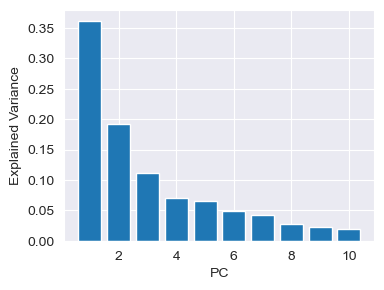

In [25]:
f, ax = plt.subplots(figsize=(4,3))
plt.bar(range(1,11),pca.explained_variance_ratio_)
plt.xlabel('PC')
plt.ylabel('Explained Variance')

3. Based on this plot select a number of PCs to compress the data. 
4. What is the accuracy of a classifier using the compressed representation?

In [31]:
X_r3 = X_r[:,:3]

In [32]:
scores = cross_val_score(kNN, X_r3, y, cv=10)
print(scores.mean())

0.9722222222222221


5. What is the accuracy if we use just one PC?

In [33]:
X_r1 = X_r[:,:1]

In [34]:
scores = cross_val_score(kNN, X_r1, y, cv=10)
print(scores.mean())

0.8607843137254904
